In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
  accuracy_score, classification_report, confusion_matrix,
  f1_score, precision_recall_curve, r2_score, roc_auc_score, roc_curve
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

print('Bibliotecas carregadas com sucesso!')


Bibliotecas carregadas com sucesso!


In [7]:
df = pd.read_csv('/content/pulsar.csv')

print(f'Dataset carregado: {df.shape[0]} observações x {df.shape[1]} features')
print(f'\nPrimeiras linhas')
df.head()

Dataset carregado: 17898 observações x 9 features

Primeiras linhas


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
print('='*80)
print('INFORMAÇõES DO DATASET')
print('='*80)

df.info()

print('\n'+'='*80)
print('ESTATISTICAS DESCRITIVAS')
print('='*80)

df.describe().round(2)

INFORMAÇõES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


In [21]:
print('Valores Ausentes:')
print(df.isnull().sum())

print(f'\nDuplicatas: {df.duplicated().sum()}')

print('\n'+'='*80)
print('DISTRIBUIÇÂO DAS CLASSES')
print('='*80)

class_counts = df['target_class'].value_counts()

print(f'\nNão-Pulsares (0): {class_counts[0]:,} ({class_counts[0] / len(df) * 100 :.2f}%)')
print(f'Pulsares (1):     {class_counts[1]:,}  ({class_counts[1] / len(df) * 100 :.2f}%)')

print(f'\nRazão do desbalanceamento: {class_counts[0] / class_counts[1]:.2f}:1')


Valores Ausentes:
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

Duplicatas: 0

DISTRIBUIÇÂO DAS CLASSES

Não-Pulsares (0): 16,259 (90.84%)
Pulsares (1):     1,639  (9.16%)

Razão do desbalanceamento: 9.92:1


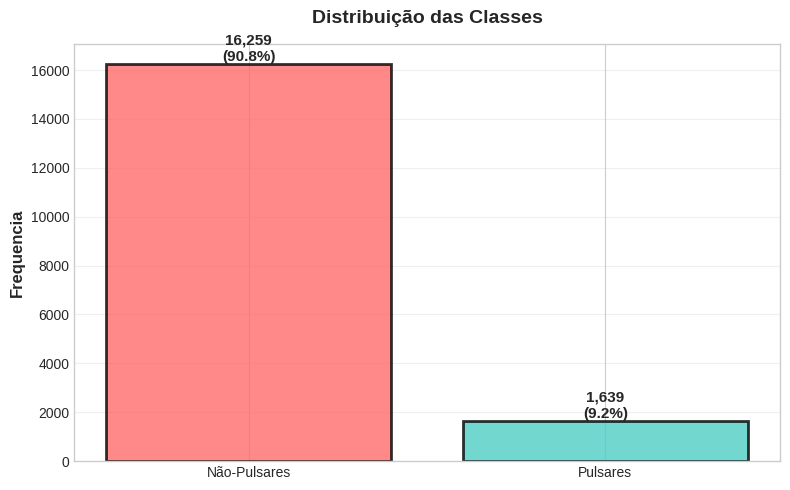

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))

counts = df.target_class.value_counts()
colors = ['#FF6B6B', '#4ECDC4']
labels = ['Não-Pulsares', 'Pulsares']

bars = ax.bar(labels, counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

ax.set_ylabel('Frequencia', fontsize=12, fontweight='bold')
ax.set_title('Distribuição das Classes', fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, counts.values)):
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count:,}\n({count / len(df) * 100:.1f}%)', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



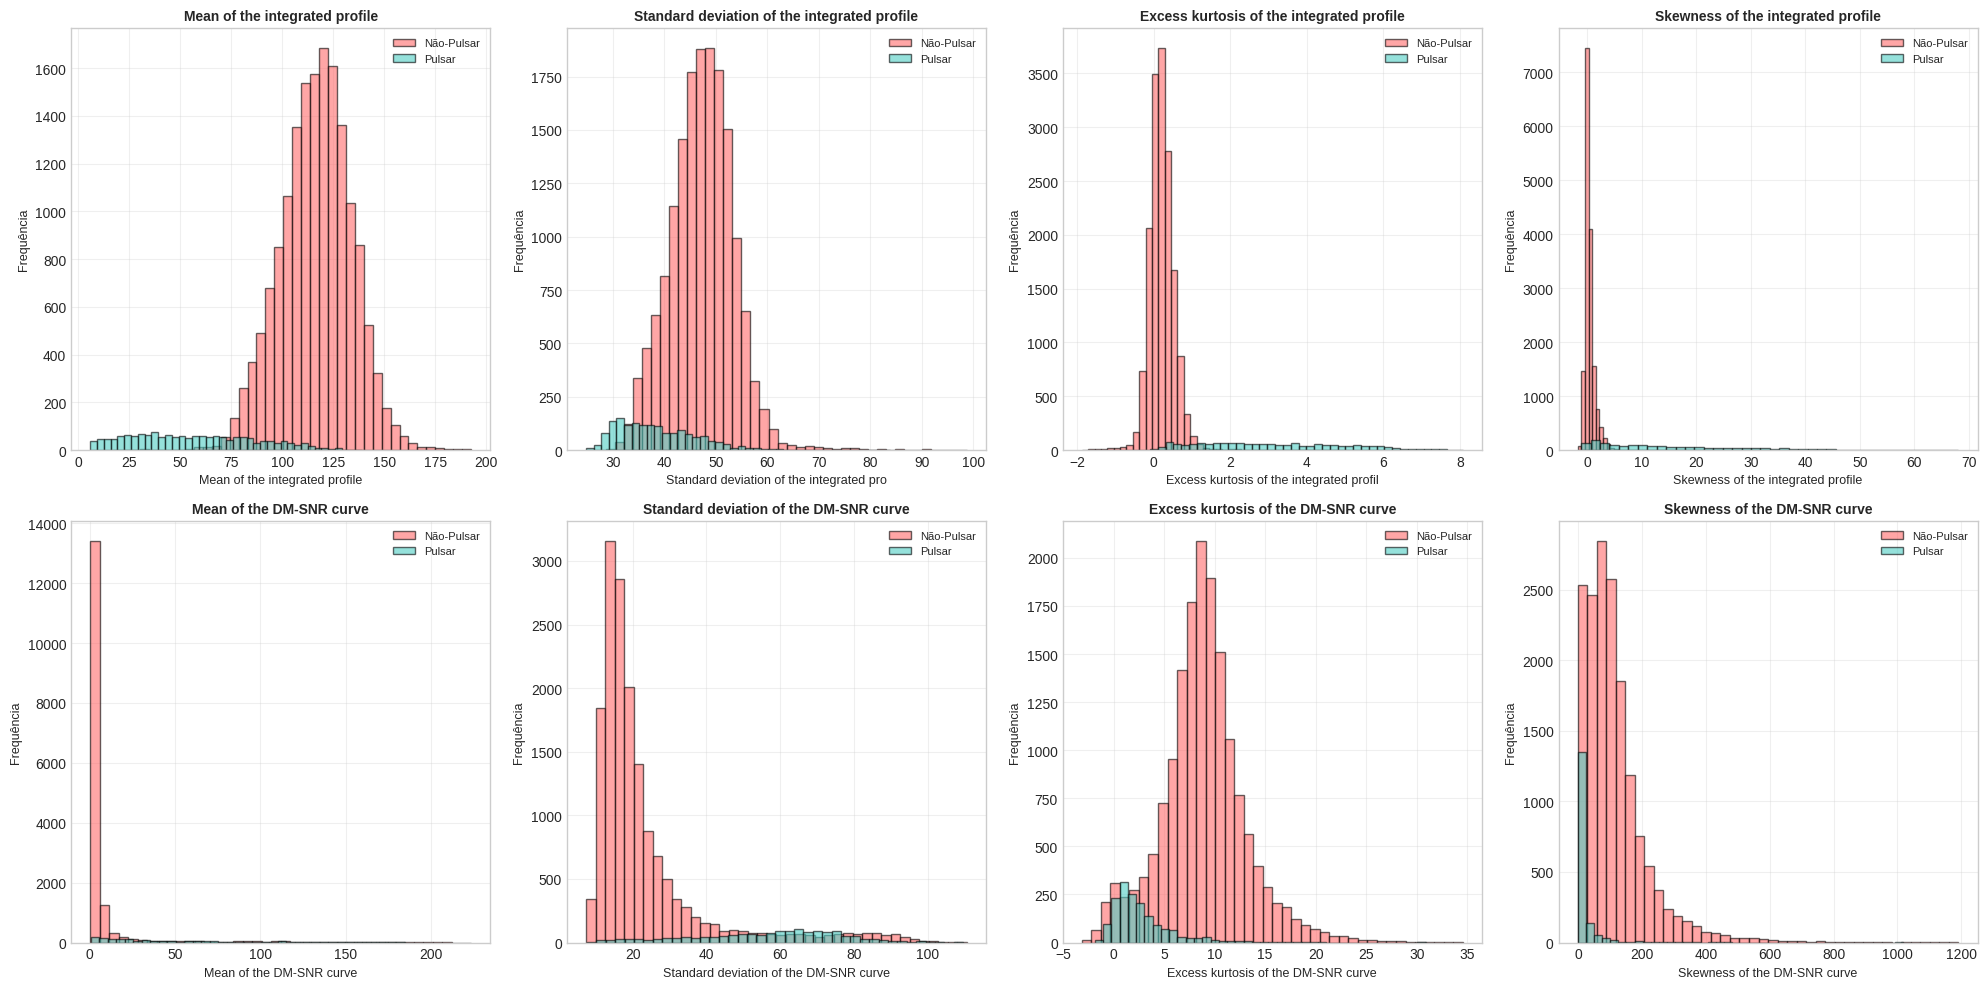

In [25]:
feature_cols = [col for col in df.columns if col != 'target_class']

fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
  ax = axes[idx]

  ax.hist(df[df['target_class'] == 0][col], bins=40, alpha=0.6, label='Não-Pulsar', color='#FF6B6B', edgecolor='black')
  ax.hist(df[df['target_class'] == 1][col], bins=40, alpha=0.6, label='Pulsar', color='#4ECDC4', edgecolor='black')

  ax.set_xlabel(col[:40], fontsize=9)
  ax.set_ylabel('Frequência', fontsize=9)
  ax.set_title(col[:50], fontsize=10, fontweight='bold')
  ax.legend(fontsize=8)
  ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


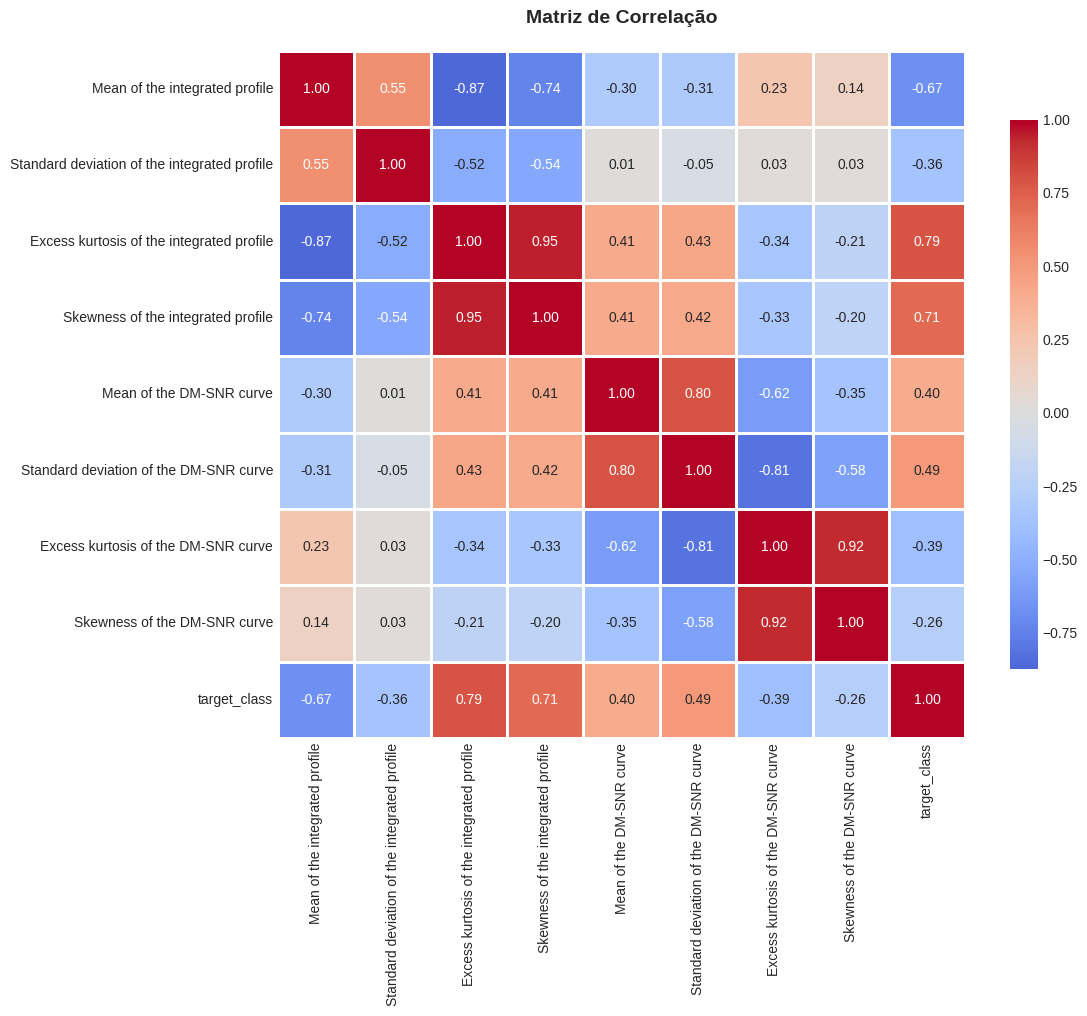

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8}, ax=ax)

ax.set_title('Matriz de Correlação', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


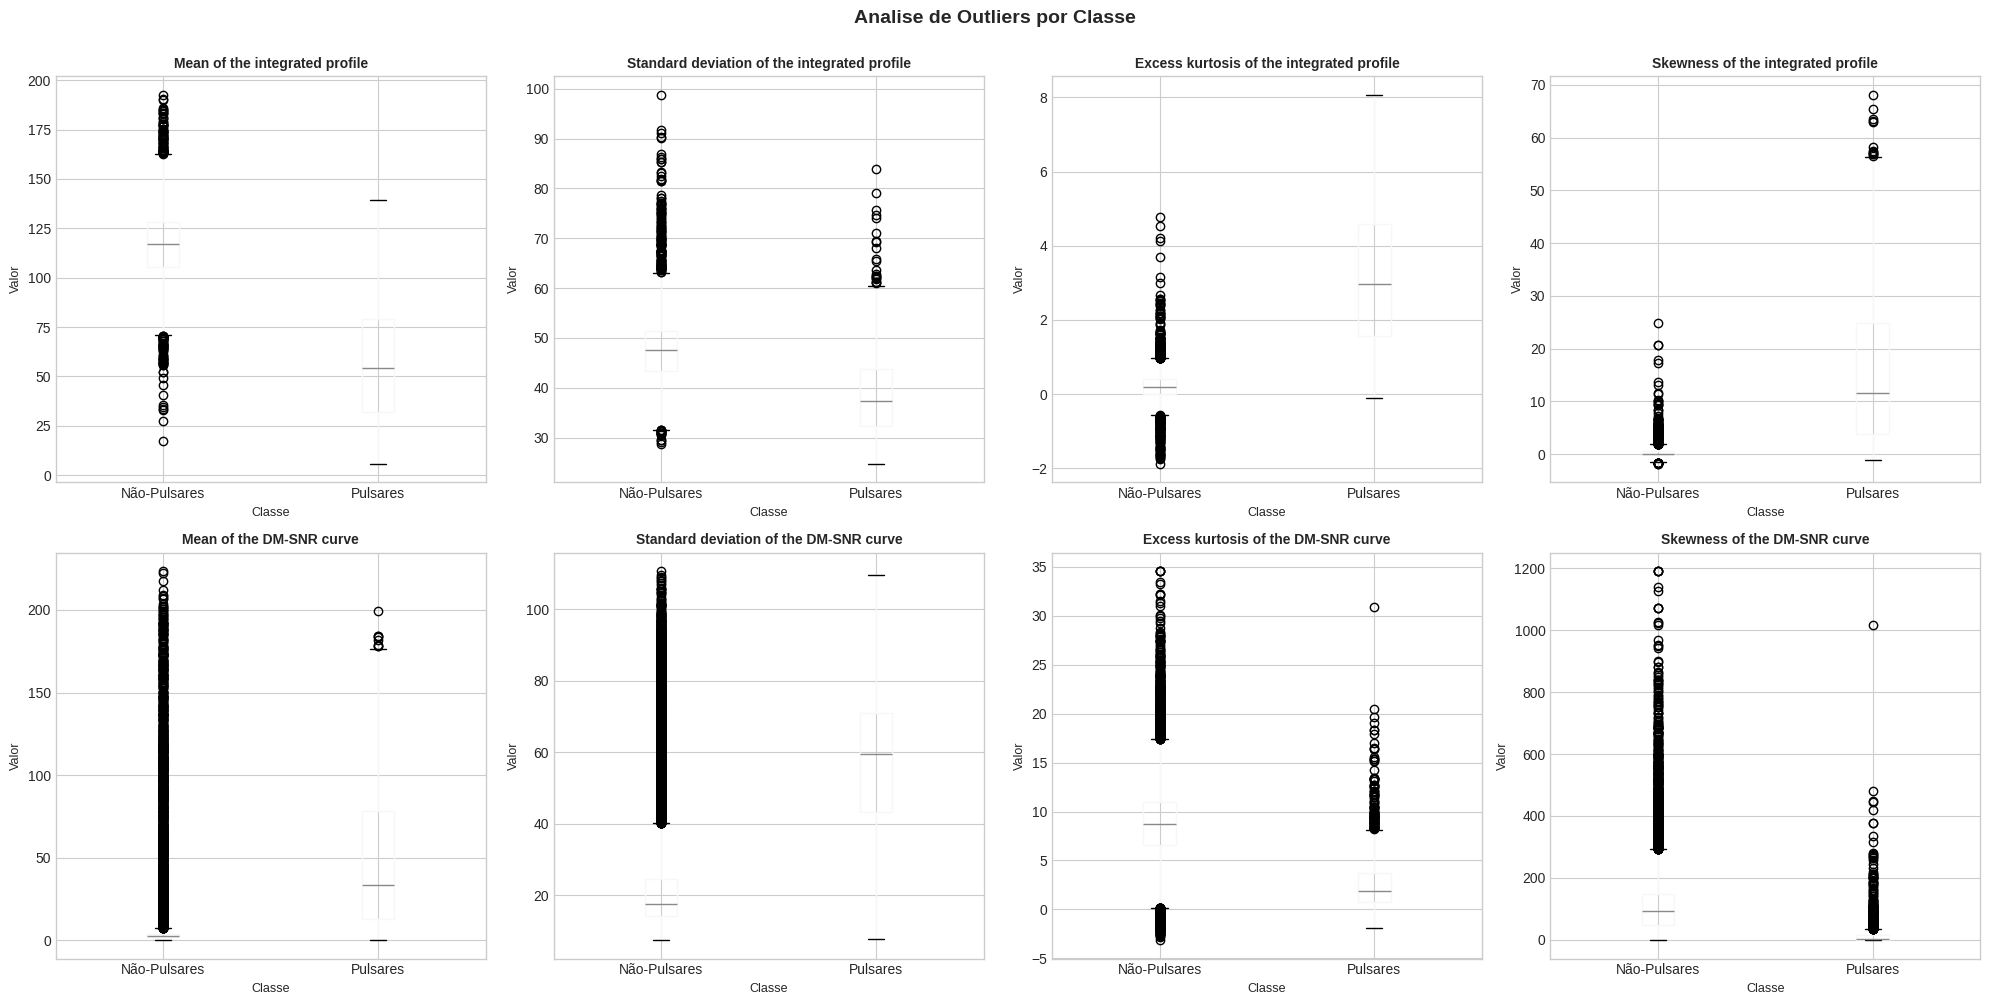

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
  df.boxplot(column=col, by='target_class', ax=axes[idx])
  axes[idx].set_title(col[:50], fontsize=10, fontweight='bold')
  axes[idx].set_xlabel('Classe', fontsize=9)
  axes[idx].set_ylabel('Valor', fontsize=9)

  plt.sca(axes[idx])
  plt.xticks([1, 2], labels)

plt.suptitle('Analise de Outliers por Classe', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


In [30]:
X = df.drop('target_class', axis=1)
y = df['target_class']

print(f'Features (X): {X.shape}')
print(f'Target (y): {y.shape}')
print(f'\nNumero de Classes: {y.nunique()}')


Features (X): (17898, 8)
Target (y): (17898,)

Numero de Classes: 2


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Treino: {X_train.shape[0]:,} amostras (80%)')
print(f'Teste: {X_test.shape[0]:,} amostras (20%)')

print('\nDistribuição Estratificada:')
train_dist = pd.Series(y_train).value_counts(normalize=True)
test_dist = pd.Series(y_test).value_counts(normalize=True)

print(f'- Treino - Não-Pulsar: {train_dist[0] * 100:.2f}% | Pulsar: {train_dist[1] * 100:.2f}%')
print(f'- Teste - Não-Pulsar: {test_dist[0] * 100:.2f}% | Pulsar: {test_dist[1] * 100:.2f}%')


Treino: 14,318 amostras (80%)
Teste: 3,580 amostras (20%)

Distribuição Estratificada:
- Treino - Não-Pulsar: 90.84% | Pulsar: 9.16%
- Teste - Não-Pulsar: 90.84% | Pulsar: 9.16%


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Normalização Concluída (StandardScaler):')
print(f'- Média do treino: {X_train_scaled.mean():.6f}')
print(f'- Média do teste: {X_test_scaled.mean():.6f}')
print('\nDados prontos para modelagem!')


Normalização Concluída (StandardScaler):
- Média do treino: 0.000000
- Média do teste: 0.004986

Dados prontos para modelagem!


In [39]:
param_grid = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'penalty': ['l2'],
  'solver': ['lbfgs', 'liblinear', 'saga'],
  'max_iter': [1000]
}

print('Parametros para otimização')
for param, values in param_grid.items():
  print(f'- {param}: {values}')

Parametros para otimização
- C: [0.001, 0.01, 0.1, 1, 10, 100]
- penalty: ['l2']
- solver: ['lbfgs', 'liblinear', 'saga']
- max_iter: [1000]


In [40]:
print('Executando Grid Search com 5-fold CV...\n')

grid_search = GridSearchCV(
  LogisticRegression(random_state=42, class_weight='balanced'),
  param_grid,
  cv=5,
  scoring='f1',
  n_jobs=-1,
  verbose=2,
)

grid_search.fit(X_train_scaled, y_train)

print('\n'+'='*80)
print('OTIMIZAÇÂO CONCLUÍDA')
print('='*80)

print(f'\nMelhores parametros:')
for param, value in grid_search.best_params_.items():
  print(f'- {param}: {value}')

print(f'\nMelhor F1-Score (CV): {grid_search.best_score_:.4f}')

model = grid_search.best_estimator_


Executando Grid Search com 5-fold CV...

Fitting 5 folds for each of 18 candidates, totalling 90 fits

OTIMIZAÇÂO CONCLUÍDA

Melhores parametros:
- C: 0.1
- max_iter: 1000
- penalty: l2
- solver: lbfgs

Melhor F1-Score (CV): 0.8483


In [41]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1', n_jobs=-1)

print('Validação Cruzada (5-fold):')
print(f'- F1-Scores: {cv_scores}')
print(f'- Media: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})')


Validação Cruzada (5-fold):
- F1-Scores: [0.84375    0.83636364 0.84324324 0.86338798 0.85460993]
- Media: 0.8483 (± 0.0096)


In [42]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print('='*80)
print('MÉTRICAS DE CLASSIFICAÇÂO')
print('='*80)

print(classification_report(y_test, y_pred, target_names=labels, digits=4))

MÉTRICAS DE CLASSIFICAÇÂO
              precision    recall  f1-score   support

Não-Pulsares     0.9916    0.9760    0.9837      3252
    Pulsares     0.7942    0.9177    0.8515       328

    accuracy                         0.9707      3580
   macro avg     0.8929    0.9468    0.9176      3580
weighted avg     0.9735    0.9707    0.9716      3580



In [43]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('METRICAS PRINCIPAIS:')
print(f'- Acurácia: {accuracy:.4f} ({accuracy * 100:.2f}%)')
print(f'- F1-Score: {f1:.4f}')
print(f'- AUC-ROC: {roc_auc:.4f}')


METRICAS PRINCIPAIS:
- Acurácia: 0.9707 (97.07%)
- F1-Score: 0.8515
- AUC-ROC: 0.9723


In [51]:
cm = confusion_matrix(y_test, y_pred)

print('MATRIZ DE CONFUSÂO:')
print(f'\n{'':20} Predito Não-Pulsar  Predito Pulsar')
print(f'Real Não-Pulsar                {cm[0,0]:8d}        {cm[0,1]:8d}')
print(f'Real Pulsar                    {cm[1,0]:8d}        {cm[1,1]:8d}')

tn, fp, fn, tp = cm.ravel()

print('\nANÁLISE DE ERROS:')
print(f'- Verdadeiros Negativos (TN): {tn:5d}')
print(f'- Falsos Positivos (FP):      {fp:5d}')
print(f'- Falsos Negativos (FN):      {fn:5d} ⚠️')
print(f'- Verdadeiros Positivos (TP): {tp:5d}')

MATRIZ DE CONFUSÂO:

                     Predito Não-Pulsar  Predito Pulsar
Real Não-Pulsar                    3174              78
Real Pulsar                          27             301

ANÁLISE DE ERROS:
- Verdadeiros Negativos (TN):  3174
- Falsos Positivos (FP):         78
- Falsos Negativos (FN):         27 ⚠️
- Verdadeiros Positivos (TP):   301



IMPORTÂNCIA DAS FEATURES (coeficientes):
                                     feature  coeficiente
   Excess kurtosis of the integrated profile     4.416191
      Standard deviation of the DM-SNR curve     1.030616
                    Mean of the DM-SNR curve    -0.668528
          Skewness of the integrated profile    -0.576090
                Skewness of the DM-SNR curve    -0.420995
Standard deviation of the integrated profile     0.224631
         Excess kurtosis of the DM-SNR curve     0.133325
              Mean of the integrated profile     0.067255



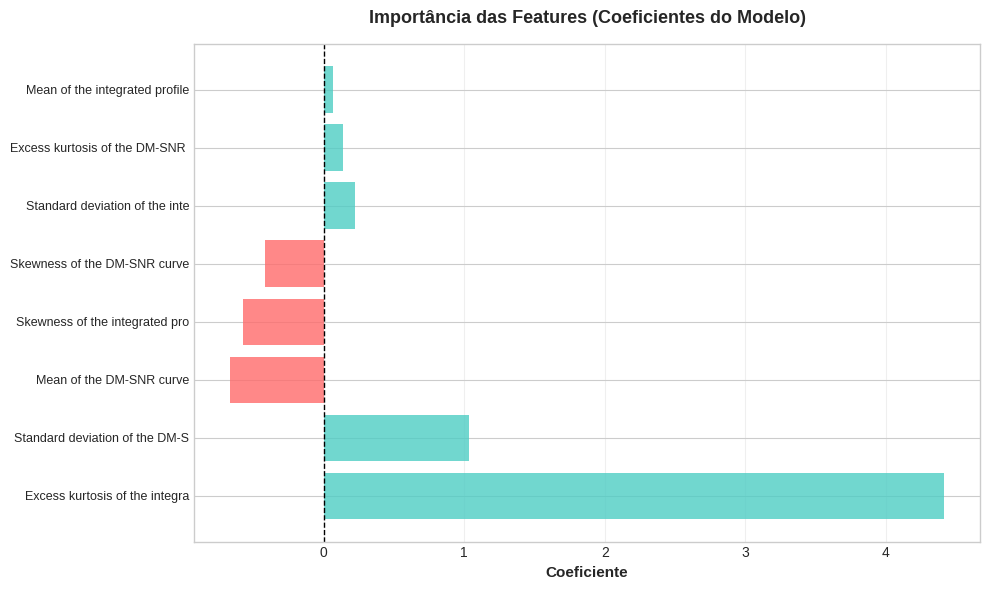

In [53]:
feature_importance = pd.DataFrame({
  'feature': X.columns,
  'coeficiente': model.coef_[0]
}).sort_values('coeficiente', key=abs, ascending=False)

print("\nIMPORTÂNCIA DAS FEATURES (coeficientes):")
print(feature_importance.to_string(index=False))

# Visualização
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#4ECDC4' if x > 0 else '#FF6B6B' for x in feature_importance['coeficiente']]
bars = ax.barh(range(len(feature_importance)), feature_importance['coeficiente'], color=colors, alpha=0.8)

ax.set_yticks(range(len(feature_importance)))
ax.set_yticklabels([f[:30] for f in feature_importance['feature']], fontsize=9)
ax.set_xlabel('Coeficiente', fontsize=11, fontweight='bold')
ax.set_title('Importância das Features (Coeficientes do Modelo)', fontsize=13, fontweight='bold', pad=15)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.grid(axis='x', alpha=0.3)

print()
plt.tight_layout()
plt.show()

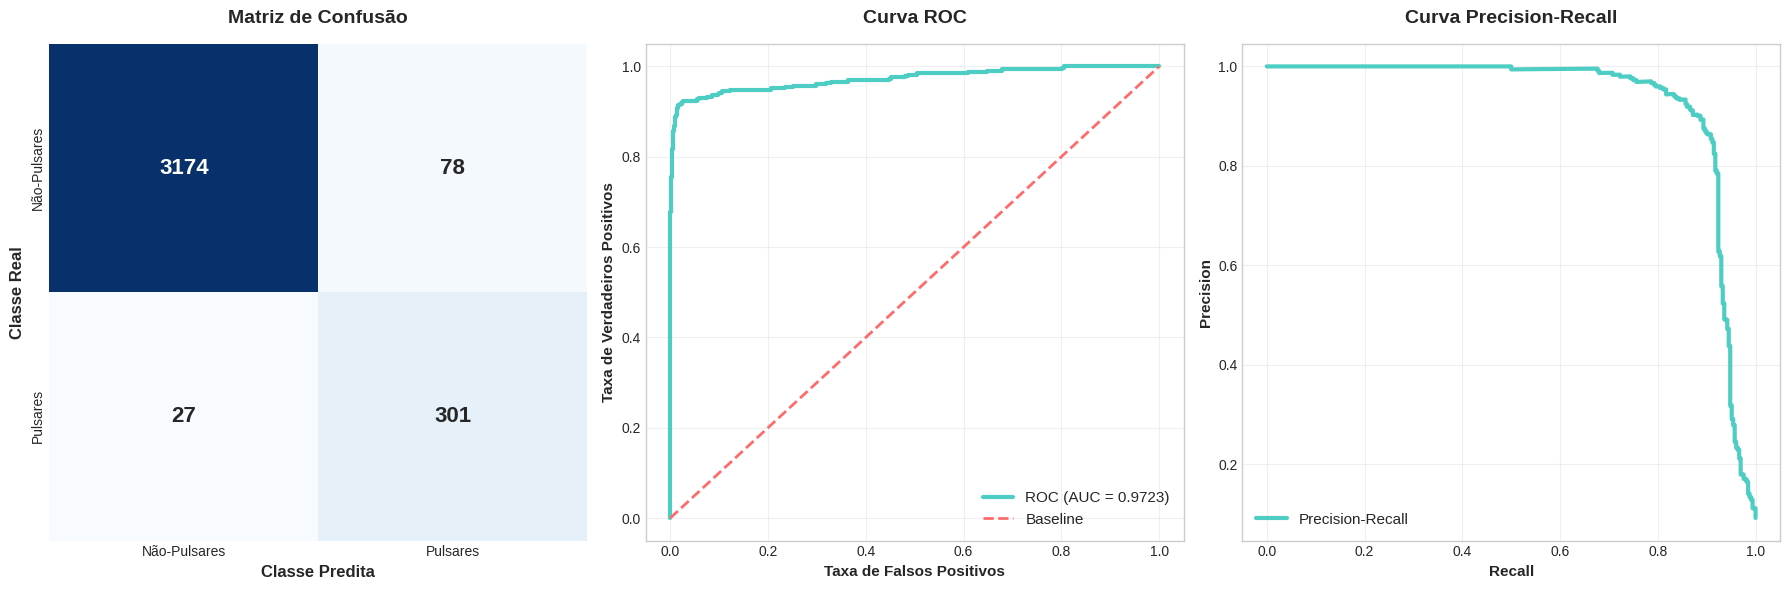

In [56]:
fig = plt.figure(figsize=(18, 6))

# 1. Matriz de Confusão
ax1 = plt.subplot(1, 3, 1)
sns.heatmap(
  cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels,
  yticklabels=labels, ax=ax1, annot_kws={'size': 16, 'weight': 'bold'})
ax1.set_ylabel('Classe Real', fontsize=12, fontweight='bold')
ax1.set_xlabel('Classe Predita', fontsize=12, fontweight='bold')
ax1.set_title('Matriz de Confusão', fontsize=14, fontweight='bold', pad=15)

# 2. Curva ROC
ax2 = plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

ax2.plot(fpr, tpr, color='#4ECDC4', lw=3, label=f'ROC (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='#FF6B6B', lw=2, linestyle='--', label='Baseline')
ax2.set_xlabel('Taxa de Falsos Positivos', fontsize=11, fontweight='bold')
ax2.set_ylabel('Taxa de Verdadeiros Positivos', fontsize=11, fontweight='bold')
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold', pad=15)
ax2.legend(loc='lower right', fontsize=11)
ax2.grid(alpha=0.3)

# 3. Curva Precision-Recall
ax3 = plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

ax3.plot(recall, precision, color='#4ECDC4', lw=3, label='Precision-Recall')
ax3.set_xlabel('Recall', fontsize=11, fontweight='bold')
ax3.set_ylabel('Precision', fontsize=11, fontweight='bold')
ax3.set_title('Curva Precision-Recall', fontsize=14, fontweight='bold', pad=15)
ax3.legend(loc='lower left', fontsize=11)
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [57]:
def predict_pulsar(features):
  # Normalizar
  features_scaled = scaler.transform([features])

  # Predição
  prediction = model.predict(features_scaled)[0]
  probability = model.predict_proba(features_scaled)[0]

  # Resultado
  result = 'PULSAR' if prediction == 1 else 'NÃO-PULSAR'
  confidence = probability[prediction]

  print('='*60)
  print(f'PREDIÇÃO: {result}')
  print(f'Confiança: {confidence:.2%}')
  print('='*60)
  print(f'Probabilidades:')
  print(f'- Não-Pulsar: {probability[0]:.4f}')
  print(f'- Pulsar:     {probability[1]:.4f}')

  return prediction, probability

# Exemplo: usar primeira observação do teste
example_features = X_test.iloc[0].values
true_label = y_test.iloc[0]

print('Testando com primeira observação do conjunto de teste:\n')
print('Features:')
for i, (name, value) in enumerate(zip(X.columns, example_features)):
  print(f'  {name[:40]}: {value:.3f}')

print(f'\nClasse real: {'PULSAR' if true_label == 1 else 'NÃO-PULSAR'}')
print()

pred, proba = predict_pulsar(example_features)

Testando com primeira observação do conjunto de teste:

Features:
  Mean of the integrated profile: 135.750
  Standard deviation of the integrated pro: 44.233
  Excess kurtosis of the integrated profil: -0.019
  Skewness of the integrated profile: 0.227
  Mean of the DM-SNR curve: 2.419
  Standard deviation of the DM-SNR curve: 13.725
  Excess kurtosis of the DM-SNR curve: 9.436
  Skewness of the DM-SNR curve: 123.465

Classe real: NÃO-PULSAR

PREDIÇÃO: NÃO-PULSAR
Confiança: 98.38%
Probabilidades:
- Não-Pulsar: 0.9838
- Pulsar:     0.0162


In [58]:
# Simulando um pulsar típico
pulsar_like = [
  120.5,  # Mean integrated profile
  45.2,   # Std dev integrated profile
  3.8,    # Excess kurtosis integrated (ALTO - importante!)
  0.5,    # Skewness integrated
  5.2,    # Mean DM-SNR
  28.4,   # Std dev DM-SNR (ALTO - importante!)
  2.1,    # Excess kurtosis DM-SNR
  15.3    # Skewness DM-SNR
]

print('Testando observação customizada (características de pulsar):\n')
predict_pulsar(pulsar_like)

Testando observação customizada (características de pulsar):

PREDIÇÃO: PULSAR
Confiança: 100.00%
Probabilidades:
- Não-Pulsar: 0.0000
- Pulsar:     1.0000


(np.int64(1), array([3.18874312e-06, 9.99996811e-01]))

### Resultados Principais:

- **Acurácia:** 97.07%
- **F1-Score:** 0.8515
- **ROC-AUC:** 0.9723
- **Recall para Pulsares:** 91.77%

### Features Mais Importantes:

1. **Excess kurtosis integrated profile** (coef: +4.42)
2. **Std dev DM-SNR curve** (coef: +1.03)

### Pontos Fortes:

✅ Alta capacidade de detecção de pulsares (91.77% recall)  
✅ Baixa taxa de falsos positivos (apenas 78 casos)  
✅ Modelo interpretável e rápido  
✅ Robusto em validação cruzada  

### Limitações:

⚠️ 27 pulsares não detectados (8.2% de falsos negativos)  
⚠️ Dataset desbalanceado (9.92:1)